In [85]:
# Import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import keras
warnings.filterwarnings('ignore')
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
plt.style.use('fivethirtyeight')

In [86]:
pd.options.display.max_columns = None

In [87]:
# Import data
LPI = pd.read_csv('Port.csv')
LPI

,Year,Port,TEU
0,2001,Busan,0.62963
1,2001,Busan,0.57815
2,2001,Busan,0.71617
3,2001,Busan,0.68103
4,2001,Busan,0.66831
...,...,...,...
277,2024,Busan,1.87769
278,2024,Busan,2.14240
279,2024,Busan,2.04198
280,2024,Busan,2.09780


In [88]:
# Give out the number of rows and columns of the dataset
LPI.shape

(282, 3)

In [89]:
# Show out the basic information of the dataset
LPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    282 non-null    int64  
 1   Port    282 non-null    object 
 2   TEU     282 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.7+ KB


In [90]:
# Create a new define for
df = LPI

In [91]:
# Give all the null data
df.isna().sum()

Year    0
Port    0
TEU     0
dtype: int64

In [92]:
# We can use function to .
df = df.fillna(method='bfill')

In [93]:
# Verify again if any null values remain.
df.isnull().sum()

Year    0
Port    0
TEU     0
dtype: int64

In [94]:
df

,Year,Port,TEU
0,2001,Busan,0.62963
1,2001,Busan,0.57815
2,2001,Busan,0.71617
3,2001,Busan,0.68103
4,2001,Busan,0.66831
...,...,...,...
277,2024,Busan,1.87769
278,2024,Busan,2.14240
279,2024,Busan,2.04198
280,2024,Busan,2.09780


In [95]:
# Give a briefly description of the dataframe
df.describe()

,Year,TEU
count,282.000000,282.000000
mean,2012.219858,1.386082
std,6.831570,0.406722
min,2001.000000,0.578150
25%,2006.000000,1.013340
50%,2012.000000,1.432925
75%,2018.000000,1.745488
max,2024.000000,2.142400


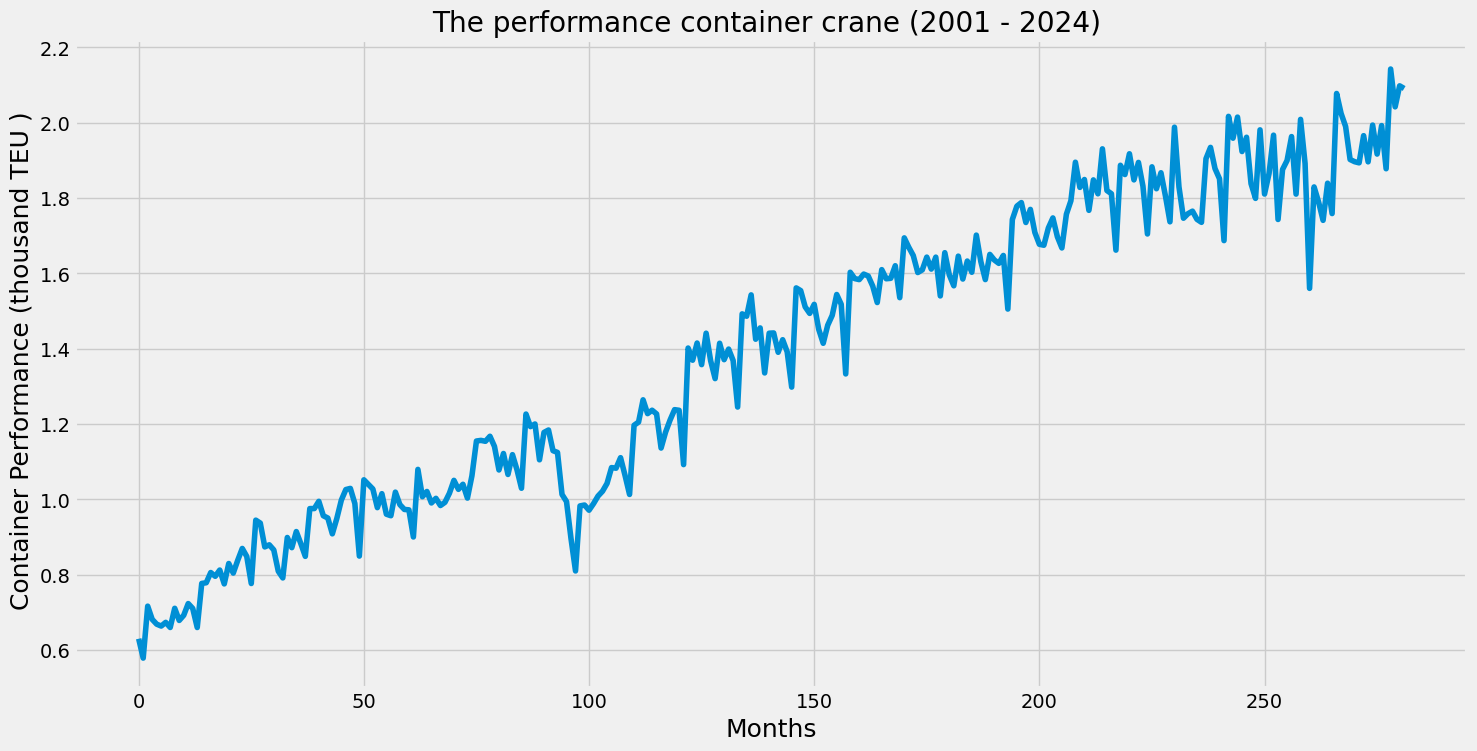

In [96]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('The performance container crane (2001 - 2024) ')
plt.plot(df['TEU'])
plt.xlabel('Months', fontsize=18)
plt.ylabel(' Container Performance (thousand TEU )', fontsize=18)
plt.show()

In [97]:
Data_sort = df.iloc[::]
Data_sort

,Year,Port,TEU
0,2001,Busan,0.62963
1,2001,Busan,0.57815
2,2001,Busan,0.71617
3,2001,Busan,0.68103
4,2001,Busan,0.66831
...,...,...,...
277,2024,Busan,1.87769
278,2024,Busan,2.14240
279,2024,Busan,2.04198
280,2024,Busan,2.09780


In [98]:
# Assuming 'Data_sort' is your original DataFrame
data = Data_sort.filter(['TEU'])  # Use the provided code snippet
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

226

In [99]:
# Scale the data to range [1, 10]
scaler = MinMaxScaler(feature_range=(1, 10))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[ 1.29619306],
       [ 1.        ],
       [ 1.7941058 ],
       [ 1.59192584],
       [ 1.51874061],
       [ 1.48980022],
       [ 1.54658782],
       [ 1.46805178],
       [ 1.761253  ],
       [ 1.57575835],
       [ 1.6546396 ],
       [ 1.83334505],
       [ 1.75929679],
       [ 1.46753396],
       [ 2.14110276],
       [ 2.15174684],
       [ 2.30755314],
       [ 2.24990251],
       [ 2.34598689],
       [ 2.13391082],
       [ 2.44558095],
       [ 2.29898034],
       [ 2.49603964],
       [ 2.67583826],
       [ 2.55328752],
       [ 2.13983698],
       [ 3.10798785],
       [ 3.06311012],
       [ 2.69942784],
       [ 2.7310724 ],
       [ 2.65293911],
       [ 2.32774812],
       [ 2.22533482],
       [ 2.84297906],
       [ 2.68774812],
       [ 2.9334825 ],
       [ 2.75051942],
       [ 2.5545533 ],
       [ 3.28462202],
       [ 3.28502477],
       [ 3.39595333],
       [ 3.17536199],
       [ 3.14015023],
       [ 2.89884609],
       [ 3.13497203],
       [ 3

In [100]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]

In [101]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 2:
        print(x_train)
        print(y_train)
        print()

[array([1.29619306])]
[1.0]

[array([1.29619306]), array([1.])]
[1.0, 1.794105801502317]



In [102]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [103]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # Change the degree for higher orders
x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))

In [104]:
# Create the test data set
test_data = scaled_data[training_data_len-1:, :]

In [105]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(1, len(test_data)):
    x_test.append(test_data[i-1:i, 0])

In [106]:
# Convert the x_test to a numpy array
x_test = np.array(x_test)

In [107]:
# Generate polynomial features for x_test
x_test_poly = poly.transform(x_test.reshape(-1, 1))

In [108]:
# Define the high-order neural network model
model = Sequential()
model.add(Dense(50, input_dim=x_train_poly.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

In [109]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [110]:
# Train the model
history = model.fit(x_train_poly, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 26.5126 - val_loss: 25.5257
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4575 - val_loss: 1.5850
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5550 - val_loss: 6.2393
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4108 - val_loss: 17.5880
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9452 - val_loss: 17.1723
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4394 - val_loss: 10.5502
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0896 - val_loss: 4.9548
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8197 - val_loss: 3.0917
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6629 - val_loss: 3.1467
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6203 - val_loss: 3.0211
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6768 - val_loss: 1.9890
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4586 - val_loss: 1.

In [111]:
# Get the model predicted price values
predictions = model.predict(x_test_poly)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [112]:
# Invert scaling for actual values
y_test_inv = scaler.inverse_transform(y_test)

In [113]:
# Calculate the root mean square error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test_inv) ** 2))
print(f"RMSE: {rmse}")

RMSE: 1.324369666087857


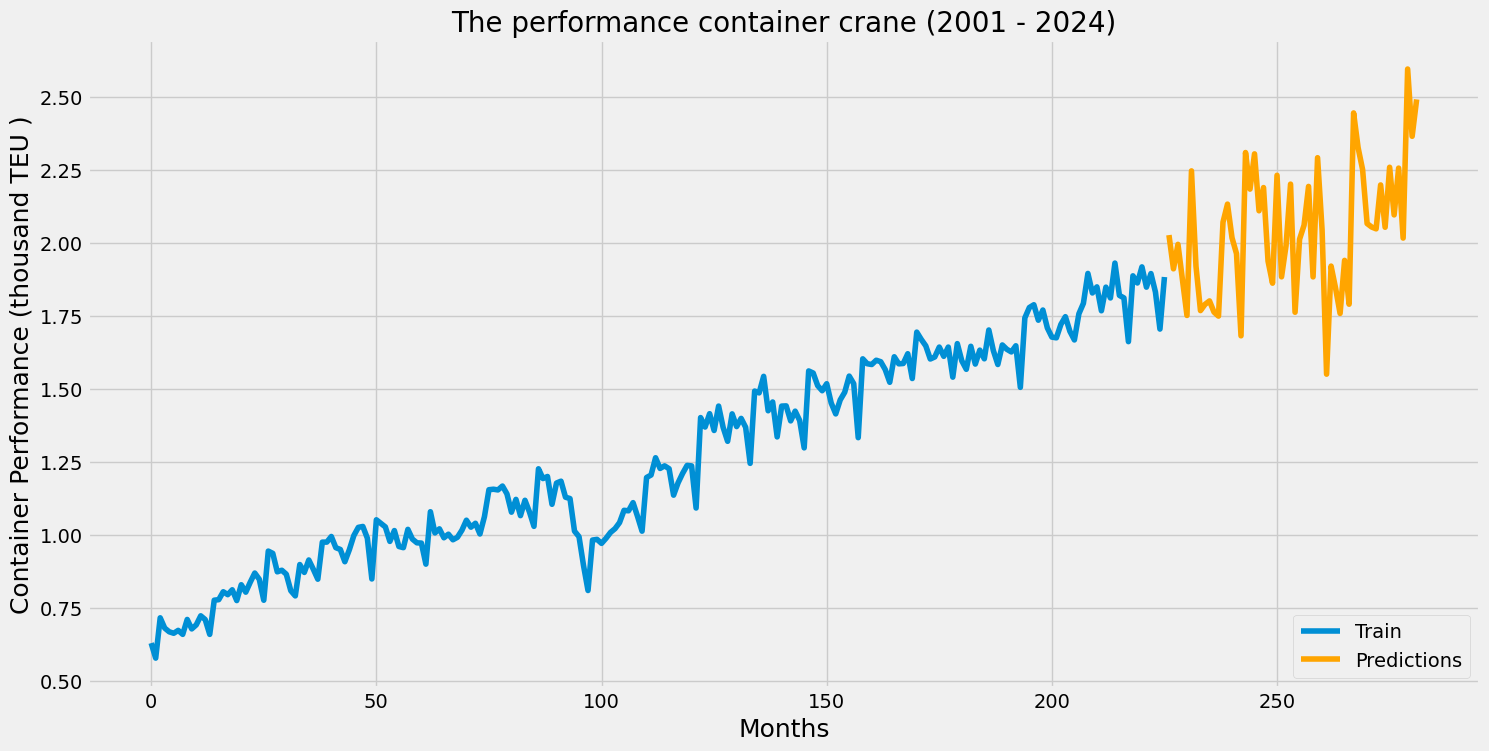

In [114]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('The performance container crane (2001 - 2024)', fontsize=20)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Container Performance (thousand TEU )', fontsize=18)
plt.plot(train['TEU'])
plt.plot(valid['Predictions'], label='Predictions', color = 'orange')
plt.legend(['Train','Predictions'], loc='lower right')
plt.show()

In [115]:
#Show the valid and predicted prices
valid

,TEU,Predictions
226,1.82455,2.026337
227,1.86698,1.910776
228,1.80498,1.994551
229,1.73668,1.872914
230,1.98793,1.751204
231,1.82926,2.246025
232,1.74622,1.919962
233,1.75829,1.767837
234,1.76502,1.789028
235,1.74329,1.800917


In [116]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print("MSE:"+str(mean_squared_error(predictions, y_test)))
print("MAE:"+str(mean_absolute_error(predictions, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(predictions, y_test))))
#print("MSLE:"+str(mean_squared_log_error(predictions, y_test)))
#print("RMSLE:"+str(np.sqrt(mean_squared_log_error(predictions, y_test))))

MSE:0.06706521511570415
MAE:0.2186146359157562
RMSE:0.2589695254575413
